# 1 Dimentional Case

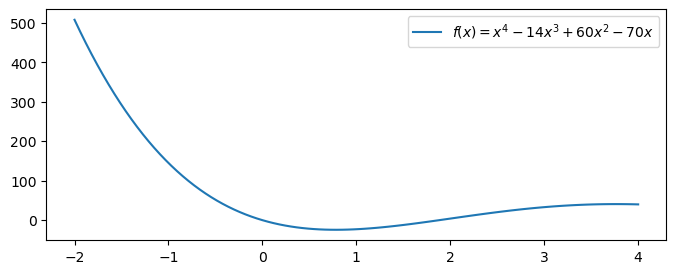

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

# plot the function
x = np.linspace(-2, 4, 100)
y = f(x)
plt.figure(figsize=(8,3))
plt.plot(x, y, label=r'$f(x) = x^4 - 14x^3 + 60x^2 - 70x$')
plt.legend()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 17428.27it/s]


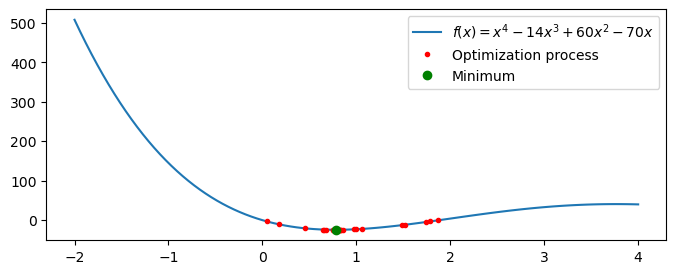

In [52]:
## Use simulated annealing to find the minimum
from sa import simulated_annealing, T, P

def f(x):
    return x[0]**4 - 14*x[0]**3 + 60*x[0]**2 - 70*x[0]

X0 = np.array([1])
N = 1000
lb = np.array([0])
ub = np.array([2])
# run simulated annealing
X_min, X_list = simulated_annealing(f, X0, T, P, N, lb, ub)

# plot the optimization process and the final result
plt.figure(figsize=(8,3))
plt.plot(x, y, label=r'$f(x) = x^4 - 14x^3 + 60x^2 - 70x$')
X_list = [X for X in X_list]
f_values = [f(X) for X in X_list]
plt.plot(X_list, f_values, 'r.', label='Optimization process')
plt.plot(X_min, f(X_min), 'go', label='Minimum')
plt.legend()
plt.savefig("./fig/1dcase_sa.svg", bbox_inches='tight')

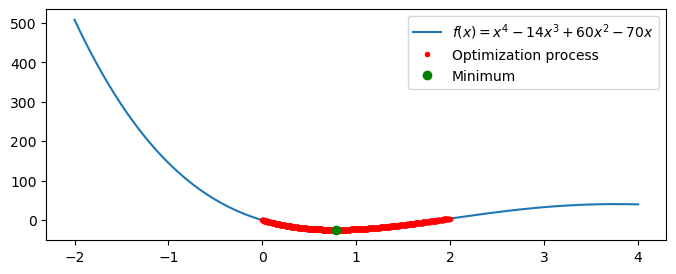

In [53]:
## Use genetic algorithm to find the minimum
from ga import genetic_algorithm, sp_crossover, mutation

def f(x):
    return x[0]**4 - 14*x[0]**3 + 60*x[0]**2 - 70*x[0]

N = 20
G = 98
M = 1
lb = np.array([0])
ub = np.array([2])
crossover = sp_crossover
X_min, X_list = genetic_algorithm(f, N, M, G, lb, ub, crossover, mutation)

# plot the optimization process and the final result
plt.figure(figsize=(8,3))
plt.plot(x, y, label=r'$f(x) = x^4 - 14x^3 + 60x^2 - 70x$')
X_list = [X[0] for X in X_list]
f_values = [f([X]) for X in X_list]
plt.plot(X_list, f_values, 'r.', label='Optimization process')
plt.plot(X_min, f([X_min]), 'go', label='Minimum')
plt.legend()
plt.savefig("./fig/1dcase_ga.svg", bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [00:00<00:00,  5.08it/s]


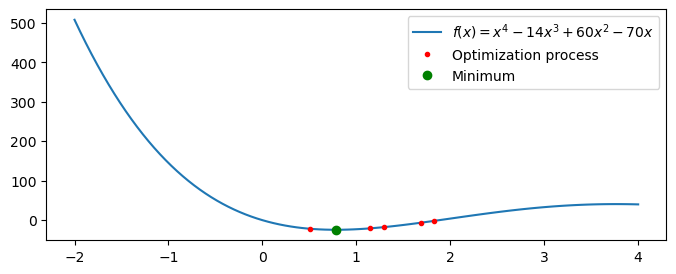

In [54]:
## Use bayesian optimization to find the minimum
from bo import bayesian_optimizer, EI
import warnings

warnings.filterwarnings("ignore")

def f(x):
    return x[0]**4 - 14*x[0]**3 + 60*x[0]**2 - 70*x[0]

def neg_f(x):
    return - f(x)

n_iter = 5
n_random_starts = 5
kappa = 1
lb = np.array([0])
ub = np.array([2])
X_min, X_list = bayesian_optimizer(neg_f, lb, ub, EI, n_iter, kappa, n_random_starts)

# plot the optimization process and the final result
plt.figure(figsize=(8,3))
plt.plot(x, y, label=r'$f(x) = x^4 - 14x^3 + 60x^2 - 70x$')
X_list = [X[0] for X in X_list]
f_values = [f([X]) for X in X_list]
plt.plot(X_list, f_values, 'r.', label='Optimization process')
plt.plot(X_min, f([X_min]), 'go', label='Minimum')
plt.legend()
plt.savefig('./fig/1dcase_bo.svg', bbox_inches='tight')
plt.show()

# 2 Dimentional Case

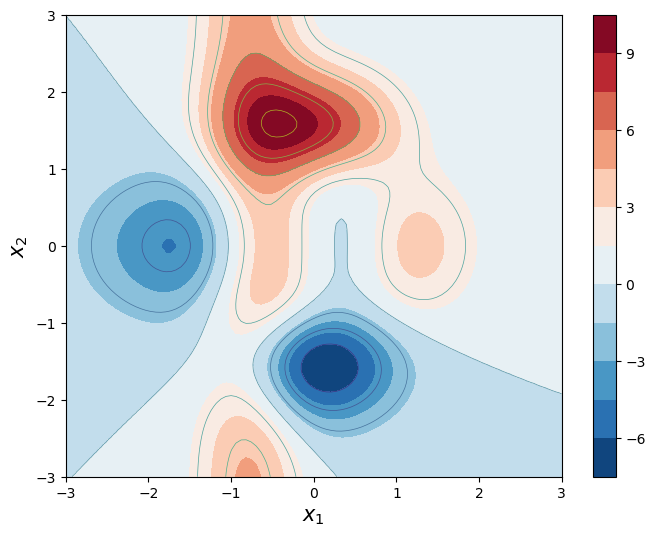

In [55]:
f = lambda x: 3*(1-x[0])**2 * np.exp(-(x[0]**2)-(x[0]+1)**2) \
    - 10 * (x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) \
    - 3 * np.exp(-(x[0]+2)**2 - x[1]**2)

import matplotlib.pyplot as plt
import numpy as np

# plot function in 3D
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
# plot in countour
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(X, Y, Z, 8, alpha=0.8, color='k', linewidths=0.5, level=14)
cntr = ax.contourf(X, Y, Z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.savefig("./fig/2dcase.svg", bbox_inches='tight')
# plt.title(r'Contour Plot of $3 \cdot (1-x)^2 \cdot e^{-x^2-(x+1)^2} - 10 \cdot (\frac{x}{5} - x^3 - y^5) \cdot e^{- x^2 - y^2} - 3 \cdot e^{-(x+2)^2 - y^2}$')

100%|██████████| 1000/1000 [00:00<00:00, 9573.96it/s]


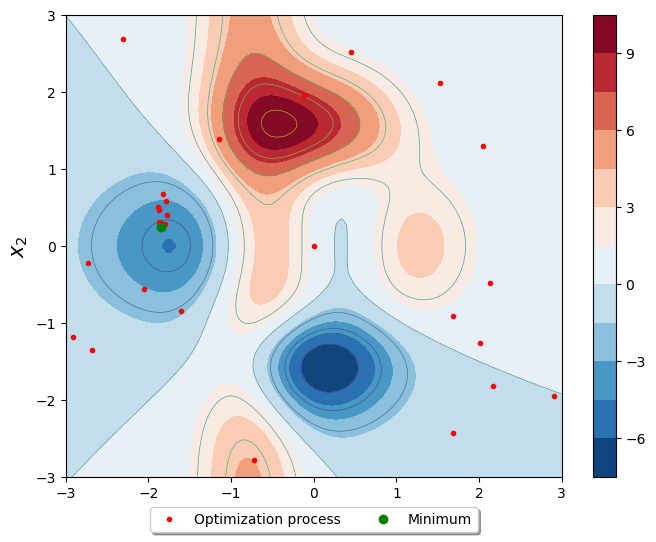

In [56]:
## Use simulated annealing to find the minimum
from sa import simulated_annealing, T, P

X0 = np.array([0, 0])
N = 1000
lb = np.array([-3, -3])
ub = np.array([3, 3])
# run simulated annealing
X_min, X_list = simulated_annealing(f, X0, T, P, N, lb, ub)

# plot the optimization process and the final result
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
# plot in countour
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(X, Y, Z, 8, alpha=0.8, color='k', linewidths=0.5, level=14)

x_list = []
y_list = []
for x in X_list:
    x_list.append(x[0])
    y_list.append(x[1])
ax.plot(x_list, y_list, 'r.', label='Optimization process')
ax.plot(X_min[0], X_min[1], 'go', label='Minimum')

cntr = ax.contourf(X, Y, Z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.savefig("./fig/2dcase_sa.svg", bbox_inches='tight')

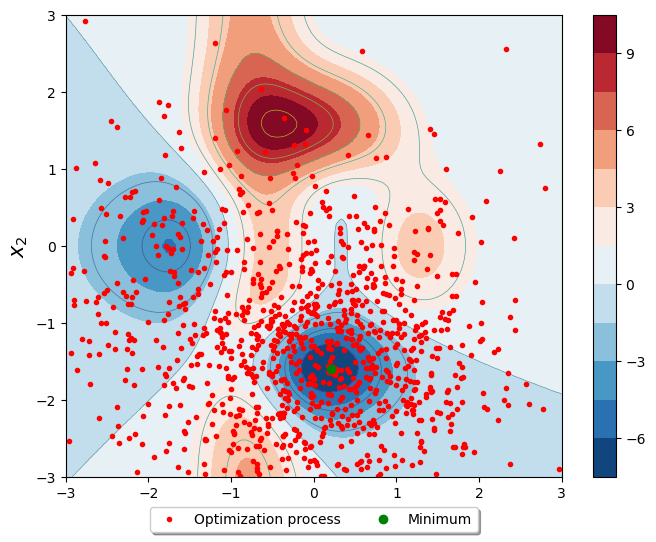

In [46]:
## Use genetic algorithm to find the minimum
from ga import genetic_algorithm, sp_crossover, mutation

N = 20
G = 98
M = 2
lb = np.array([-3, -3])
ub = np.array([3, 3])
X_min, X_list = genetic_algorithm(f, N, M, G, lb, ub, sp_crossover, mutation)

# plot the optimization process and the final result
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
# plot in countour
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(X, Y, Z, 8, alpha=0.8, color='k', linewidths=0.5, level=14)

x_list = []
y_list = []
for x in X_list:
    x_list.append(x[0])
    y_list.append(x[1])
ax.plot(x_list, y_list, 'r.', label='Optimization process')
ax.plot(X_min[0], X_min[1], 'go', label='Minimum')

cntr = ax.contourf(X, Y, Z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.savefig("./fig/2dcase_ga.svg", bbox_inches='tight')

100%|██████████| 10/10 [00:02<00:00,  4.07it/s]


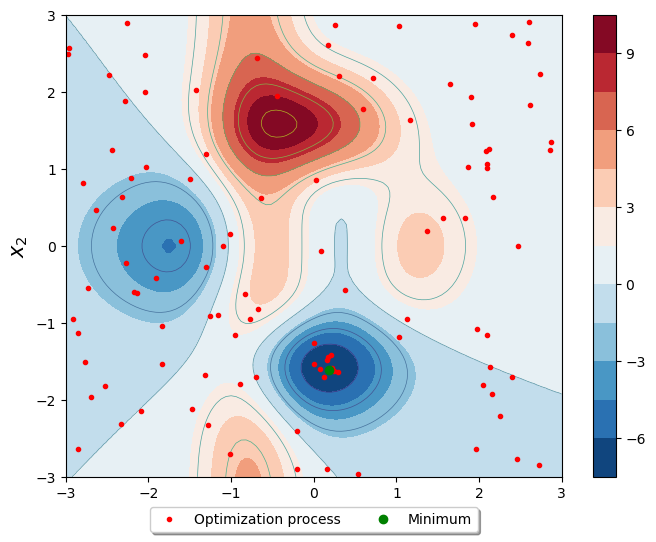

In [47]:
## Use bayesian optimization to find the minimum
from bo import bayesian_optimizer, EI
import warnings

warnings.filterwarnings("ignore")

def neg_f(x):
    return - f(x)

n_iter = 10
n_random_starts = 100
kappa = 1
lb = np.array([-3, -3])
ub = np.array([3, 3])
X_min, X_list = bayesian_optimizer(neg_f, lb, ub, EI, n_iter, kappa, n_random_starts)

# plot the optimization process and the final result
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
# plot in countour
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(X, Y, Z, 8, alpha=0.8, color='k', linewidths=0.5, level=14)

x_list = []
y_list = []
for x in X_list:
    x_list.append(x[0])
    y_list.append(x[1])
ax.plot(x_list, y_list, 'r.', label='Optimization process')
ax.plot(X_min[0], X_min[1], 'go', label='Minimum')

cntr = ax.contourf(X, Y, Z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.savefig("./fig/2dcase_bo.svg", bbox_inches='tight')

# 3 Simple Example of Bayesian Optimization

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from tqdm import tqdm
from bo import acq_max, EI

def bayesian_optimizer_m(f, lb, ub, ac, n_iter, kappa, n_random_starts):
    """
    Perform Bayesian optimization.
    
    Parameters:
        f (function): The objective function to be maximized.
        lb (array-like): The lower bounds for the solution variables.
        ub (array-like): The upper bounds for the solution variables.
        ac (function): The acquisition function to be used.
        n_iter (int): The number of iterations.
        kappa (float): The exploration-exploitation trade-off parameter.
        n_random_starts (int): The number of random starting points.
    
    Returns:
        array-like: The best solution found.
    """
    
    kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-3, 1e3)) * \
             RBF(length_scale=0.5, length_scale_bounds=(1e-3, 1e3))
             
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3)
    
    X_train = np.random.uniform(lb, ub, (n_random_starts, lb.shape[0]))
    Y_train = np.array([f(x) for x in X_train]).reshape(-1, 1)
    
    X_range = np.linspace(lb, ub, 1000)
    X_ranges = []
    Y_ranges = []
    Sigma_ranges = []
    
    for i in tqdm(range(n_iter)):
        gpr.fit(X_train, Y_train)
        
        y_max = np.max(Y_train)
        x_next = acq_max(ac, gpr, y_max, lb, ub, kappa)
        y_next = f(x_next)
        
        X_train = np.vstack((X_train, x_next.reshape(-1, lb.shape[0])))
        Y_train = np.vstack((Y_train, y_next.reshape(-1, 1)))
        
        Y_range, singma_range = gpr.predict(X_range, return_std=True)
        X_ranges.append(X_range)
        Y_ranges.append(Y_range)
        Sigma_ranges.append(singma_range)
        
    return X_train[np.argmax(Y_train)], X_train, X_ranges, Y_ranges, Sigma_ranges

In [49]:
from bo import EI
import numpy as np
import warnings

warnings.filterwarnings("ignore")

def f(x):
    return x[0]**4 - 14*x[0]**3 + 60*x[0]**2 - 70*x[0]

def neg_f(x):
    return - f(x)

n_iter = 4
n_random_starts = 1
kappa = 1
lb = np.array([0])
ub = np.array([2])
X_min, X_list, X_ranges, Y_ranges, Sigma_ranges = bayesian_optimizer_m(neg_f, lb, ub, EI, n_iter, kappa, n_random_starts)

 50%|█████     | 2/4 [00:00<00:00, 19.04it/s]

100%|██████████| 4/4 [00:00<00:00,  8.61it/s]


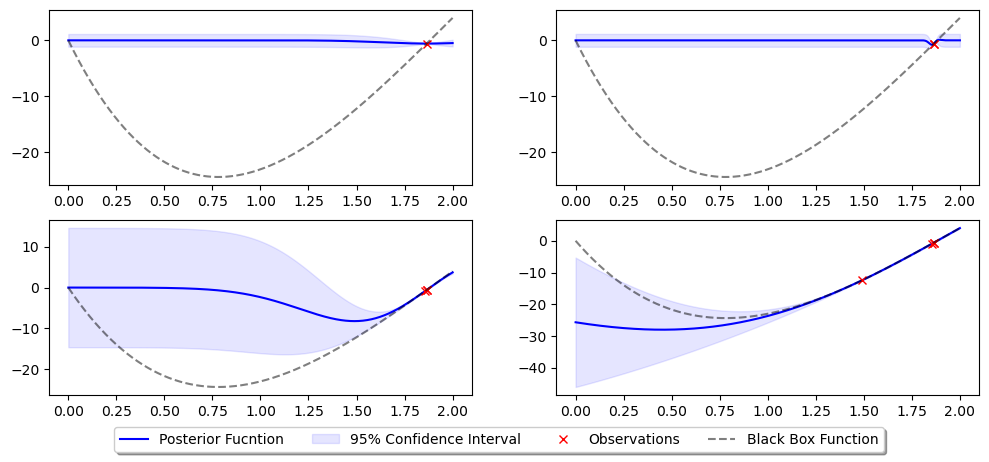

In [50]:
import matplotlib.pyplot as plt

true_X = np.linspace(0, 2, 1000).reshape(-1, 1)
true_Y = [f(x) for x in true_X]

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

for i in range(len(X_ranges)):
    axes[i // 2, i % 2].plot(X_ranges[i], -Y_ranges[i], 'b-')
    axes[i // 2, i % 2].fill_between(X_ranges[i].flatten(), 
                     - Y_ranges[i].flatten() - 1.96 * Sigma_ranges[i], 
                     - Y_ranges[i].flatten() + 1.96 * Sigma_ranges[i], 
                     alpha=0.1, color='b')
    axes[i // 2, i % 2].plot(X_list[0:i+1], [f(x) for x in X_list[0:i+1]], 'rx')
    axes[i // 2, i % 2].plot(true_X, true_Y, 'k--', alpha=0.5)

fig.legend(["Posterior Fucntion", "95% Confidence Interval", "Observations", "Black Box Function"], loc='upper center', bbox_to_anchor=(0.5, 0.06), fancybox=True, shadow=True, ncol=4)
plt.savefig("./fig/simple_example.svg", bbox_inches='tight')